In [1]:
import os 
os.getcwd()


'C:\\Users\\LENOVO\\Desktop\\PYTHON\\VERİ BİLİMİ\\dogrusal_reg_kuzenleri\\ml_2_dogrusal_reg_kuzenleri'

In [2]:
os.chdir("C:\\Users\\LENOVO\\Desktop\\PYTHON\\VERİ BİLİMİ\\bootcamp_ödev_finans_verisi")

In [381]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

In [382]:
data = pd.read_csv('hmelq.csv')

data1 = data.copy()
data2 = data.copy()

data.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [383]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 13 columns):
bad        3576 non-null int64
loan       3576 non-null int64
mortdue    3262 non-null float64
value      3512 non-null float64
reason     3429 non-null object
job        3409 non-null object
yoj        3264 non-null float64
derog      3149 non-null float64
delinq     3225 non-null float64
clage      3397 non-null float64
ninq       3273 non-null float64
clno       3443 non-null float64
debtinc    2809 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 363.3+ KB


In [384]:
# reason ve job kategorik değişkenim.

# tüm eksik gözlemleri siliyorum.

data = data.dropna()

In [385]:
data.isnull().sum()

bad        0
loan       0
mortdue    0
value      0
reason     0
job        0
yoj        0
derog      0
delinq     0
clage      0
ninq       0
clno       0
debtinc    0
dtype: int64

0    1840
1     178
Name: bad, dtype: int64

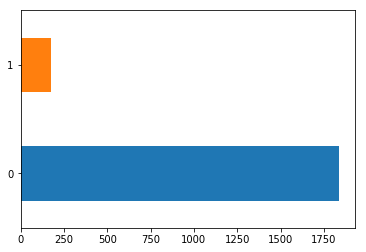

In [386]:
data["bad"].value_counts().plot.barh(); 
data["bad"].value_counts()
# 0 çok baskın 

In [387]:
y = data["bad"]

X = data.drop(["bad","reason","job"], axis = 1) # kategorik değişkenleri dummy yapmadan silerek deniyorum.

X.head()

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
153,18200,94727.0,136877.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,21700,79240.0,96784.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,34100,241931.0,36486.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,8400,62989.0,76718.0,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,17400,25859.0,43684.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108


In [388]:
loj = sm.Logit(y, X)
loj_model = loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.261768
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 2018
Model:                          Logit   Df Residuals:                     2008
Method:                           MLE   Df Model:                            9
Date:                Thu, 06 Aug 2020   Pseudo R-squ.:                  0.1227
Time:                        20:31:40   Log-Likelihood:                -528.25
converged:                       True   LL-Null:                       -602.11
                                        LLR p-value:                 2.621e-27
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
loan       -2.706e-05   1.04e-05     -2.600      0.009   -4.74e-05   -6.66e-06
mortdue    -3.409e-07   5.22e-06     -0.065      0.948   -1.06e-05     9.9e-06
value      -3.173e-06   4.29e-06     -0.739      0.460   -1.16e-05    5.24e-06
yoj           -0.0342      0.013     -2.727      0.006      -0.059      -0.010
derog          0.5800      0.122      4.758      0.000       0.341       0.819
delinq         0.7398      0.086      8.610      0.000       0.571       0.908
clage         -0.0084      0.001     -6.358      0.000      -0.011      -0.006
ninq           0.0266      0.047      0.571      0.568      -0.065       0.118
clno          -0.0505      0.011     -4.635      0.000      -0.072      -0.029
debtinc        0.0222      0.007      3.126      0.002       0.008       0.036
==============================================================================
"""

In [389]:
# R square değeri oldukça düşük. mortdue , value , ninq  değişkenleri anlamsız. loan ve yoj ise ufak bir farkla anlamsız gözüküyor.

In [390]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear") # solver = hangi fonksiyon ile işlem yapacaksın? farklı solver'lar ile deneyip bakmak da fayda var.
loj_model = loj.fit(X,y)

In [391]:
loj_model.predict_proba(X)[0:10][:,0:2] # OLASILIKLAR

array([[0.93791535, 0.06208465],
       [0.81229489, 0.18770511],
       [0.98697812, 0.01302188],
       [0.83476237, 0.16523763],
       [0.82000557, 0.17999443],
       [0.98423197, 0.01576803],
       [0.85334995, 0.14665005],
       [0.96480699, 0.03519301],
       [0.75102422, 0.24897578],
       [0.96060046, 0.03939954]])

Text(0.5, 24.0, 'predicted label')

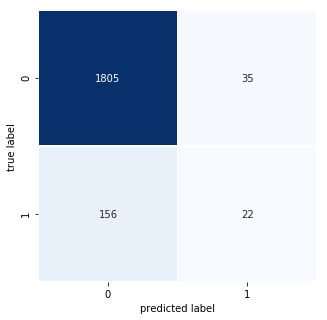

In [392]:
y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:,1]
y_probs[0:10]
y_pred = [1 if i > 0.3 else 0 for i in y_probs]

mtx = confusion_matrix(y, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(mtx, xticklabels= 'auto', yticklabels='auto', cmap="Blues", annot=True, fmt='d', linewidths=.5,  cbar=False, ax=ax)
#  square=True,
plt.ylabel('true label')
plt.xlabel('predicted label')

In [393]:
accuracy_score(y, y_pred)

0.9053518334985133

In [394]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1840
           1       0.39      0.12      0.19       178

   micro avg       0.91      0.91      0.91      2018
   macro avg       0.65      0.55      0.57      2018
weighted avg       0.87      0.91      0.88      2018



In [395]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))
logit_roc_auc

0.4986413043478261

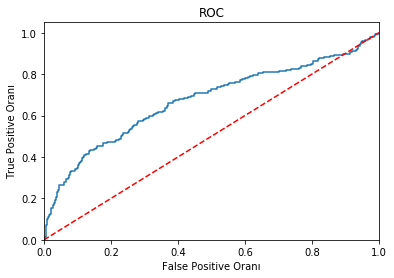

In [396]:
fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

# Solver "newton-cg"

In [397]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "newton-cg") # solver = hangi fonksiyon ile işlem yapacaksın? farklı solver'lar ile deneyip bakmak da fayda var.
loj_model = loj.fit(X,y)

C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


In [398]:
y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:,1]
y_probs[0:10]
y_pred = [1 if i > 0.3 else 0 for i in y_probs]


print("accuracy : " + str(accuracy_score(y, y_pred)))
print(classification_report(y,y_pred))

# newton daha çok 1 tahmin etti

accuracy : 0.9236868186323092
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1840
           1       0.63      0.33      0.43       178

   micro avg       0.92      0.92      0.92      2018
   macro avg       0.78      0.66      0.70      2018
weighted avg       0.91      0.92      0.91      2018



Text(0.5, 24.0, 'predicted label')

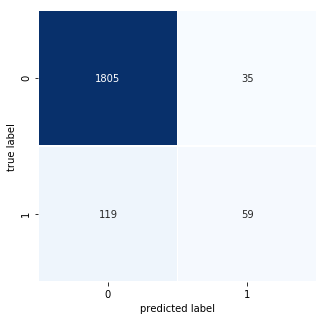

In [399]:
mtx = confusion_matrix(y, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(mtx, xticklabels= 'auto', yticklabels='auto', cmap="Blues", annot=True, fmt='d', linewidths=.5,  cbar=False, ax=ax)
#  square=True,
plt.ylabel('true label')
plt.xlabel('predicted label')

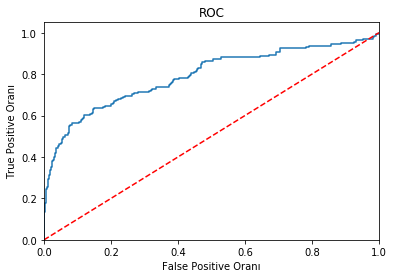

In [400]:
fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

In [401]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))
logit_roc_auc

0.593059965803615

Şimdi train ve test olarak bölerek tekrar modele sokacağız.

In [402]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.20, 
                                                    random_state = 42)

In [403]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)

In [404]:
# y_pred = loj_model.predict(X_test)
y_probs = loj_model.predict_proba(X_test)
y_probs = y_probs[:,1]
y_probs[0:10]
y_pred = [1 if i > 0.3 else 0 for i in y_probs]

Text(0.5, 24.0, 'predicted label')

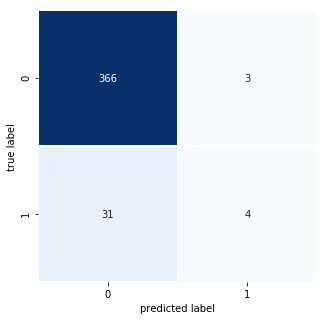

In [405]:
mtx = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(mtx, xticklabels= 'auto', yticklabels='auto', cmap="Blues", annot=True, fmt='d', linewidths=.5,  cbar=False, ax=ax)
#  square=True,
plt.ylabel('true label')
plt.xlabel('predicted label')

In [406]:
accuracy_score(y_test, y_pred) # accuracy de artış var.

0.9158415841584159

In [407]:
cross_val_score(loj_model, X_test, y_test, cv = 10).mean()

0.9208442776735462

In [408]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       369
           1       0.57      0.11      0.19        35

   micro avg       0.92      0.92      0.92       404
   macro avg       0.75      0.55      0.57       404
weighted avg       0.89      0.92      0.89       404



In [409]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))
logit_roc_auc

0.4989130434782609

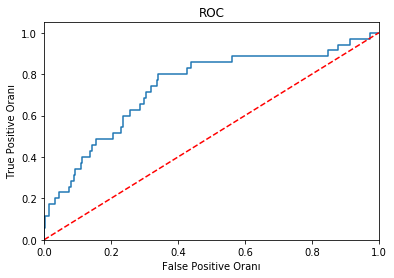

In [410]:
fpr, tpr, thresholds = roc_curve(y_test, loj_model.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

# Newton ile train-test

C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The 

 accuracy:0.9306930693069307
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       369
           1       0.73      0.31      0.44        35

   micro avg       0.93      0.93      0.93       404
   macro avg       0.84      0.65      0.70       404
weighted avg       0.92      0.93      0.92       404



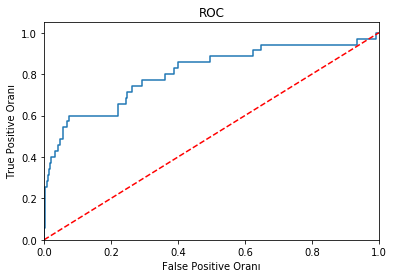

In [411]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.20, 
                                                    random_state = 42)
loj = LogisticRegression(solver = "newton-cg")
loj_model = loj.fit(X_train,y_train)

# y_pred = loj_model.predict(X_test)
y_probs = loj_model.predict_proba(X_test)
y_probs = y_probs[:,1]
y_probs[0:10]
y_pred = [1 if i > 0.3 else 0 for i in y_probs]

print(" accuracy:" + str(accuracy_score(y_test, y_pred))) # accuracy de artış var.

#cross_val_score(loj_model, X_test, y_test, cv = 10).mean()
print(classification_report(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test, loj_model.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

In [412]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))
logit_roc_auc

0.5849047386419151

Text(0.5, 24.0, 'predicted label')

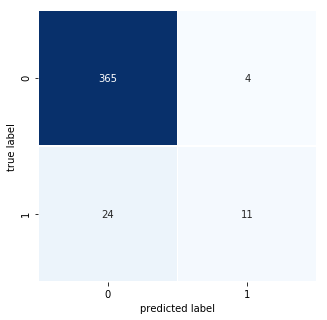

In [413]:
mtx = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(mtx, xticklabels= 'auto', yticklabels='auto', cmap="Blues", annot=True, fmt='d', linewidths=.5,  cbar=False, ax=ax)
#  square=True,
plt.ylabel('true label')
plt.xlabel('predicted label')

# Anlamsız çıkan değişkenlerin modelden çıkarılması

In [58]:
# mortdue , value , ninq  değişkenleri anlamsız. loan ve yoj ise ufak bir farkla anlamsız gözüküyor.

In [414]:
X.head(3)

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
153,18200,94727.0,136877.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,21700,79240.0,96784.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,34100,241931.0,36486.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459


In [61]:
data1.corr() 

# korelasyonda value, loan, yoj değerlerim yüksek uyumlu değil hedef değişkenimle. 
# Anlamsız çıkan ninq ise 0.17 uyumlu olduğu için şimdilik onu ellemiyorum.

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
bad,1.000000,-0.071523,-0.056226,-0.050254,-0.051532,0.270980,0.345548,-0.150367,0.174759,-0.008981,0.236738
loan,-0.071523,1.000000,0.229546,0.337453,0.123293,-0.001463,-0.021577,0.089030,0.048633,0.092377,0.093636
mortdue,-0.056226,0.229546,1.000000,0.873280,-0.089949,-0.053310,-0.004971,0.141236,0.029452,0.340139,0.167358
value,-0.050254,0.337453,0.873280,1.000000,0.002501,-0.057279,-0.011014,0.182226,-0.005191,0.290439,0.134187
yoj,-0.051532,0.123293,-0.089949,0.002501,1.000000,-0.073500,0.065401,0.184283,-0.067735,0.017809,-0.052290
derog,0.270980,-0.001463,-0.053310,-0.057279,-0.073500,1.000000,0.234706,-0.083755,0.163750,0.048631,0.032324
delinq,0.345548,-0.021577,-0.004971,-0.011014,0.065401,0.234706,1.000000,0.044245,0.081166,0.151996,0.076943
clage,-0.150367,0.089030,0.141236,0.182226,0.184283,-0.083755,0.044245,1.000000,-0.113367,0.221071,-0.042852
ninq,0.174759,0.048633,0.029452,-0.005191,-0.067735,0.163750,0.081166,-0.113367,1.000000,0.097669,0.133751
clno,-0.008981,0.092377,0.340139,0.290439,0.017809,0.048631,0.151996,0.221071,0.097669,1.000000,0.180983


In [415]:
X = X.drop(["mortdue","yoj"], axis = 1) # ilk adımda ikisini çıkarıyorum.
# X = data.drop(["bad","reason","job","mortdue","yoj"], axis = 1) 

X.head()

,loan,value,derog,delinq,clage,ninq,clno,debtinc
153,18200,136877.0,0.0,0.0,168.96,2.0,26.0,36.056
154,21700,96784.0,0.0,0.0,64.51,6.0,24.0,38.079
155,34100,36486.0,0.0,2.0,196.01,3.0,50.0,42.459
156,8400,76718.0,0.0,2.0,131.47,0.0,22.0,29.200
157,17400,43684.0,1.0,0.0,95.36,1.0,17.0,27.108


In [416]:
loj = sm.Logit(y, X)
loj_model= loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.263730
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 2018
Model:                          Logit   Df Residuals:                     2010
Method:                           MLE   Df Model:                            7
Date:                Thu, 06 Aug 2020   Pseudo R-squ.:                  0.1161
Time:                        20:38:31   Log-Likelihood:                -532.21
converged:                       True   LL-Null:                       -602.11
                                        LLR p-value:                 5.602e-27
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
loan       -3.133e-05   1.02e-05     -3.085      0.002   -5.12e-05   -1.14e-05
value      -3.259e-06   2.39e-06     -1.365      0.172   -7.94e-06    1.42e-06
derog          0.5895      0.121      4.873      0.000       0.352       0.827
delinq         0.7195      0.084      8.545      0.000       0.555       0.885
clage         -0.0094      0.001     -7.245      0.000      -0.012      -0.007
ninq           0.0270      0.046      0.582      0.561      -0.064       0.118
clno          -0.0514      0.011     -4.808      0.000      -0.072      -0.030
debtinc        0.0212      0.007      2.979      0.003       0.007       0.035
==============================================================================
"""

In [417]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear") # solver = hangi fonksiyon ile işlem yapacaksın? farklı solver'lar ile deneyip bakmak da fayda var.
loj_model = loj.fit(X,y)

Text(0.5, 24.0, 'predicted label')

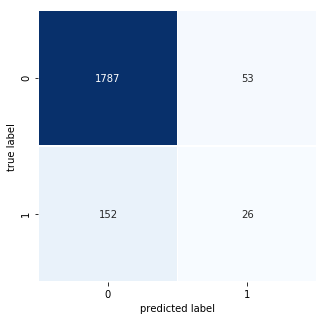

In [418]:
y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:,1]
y_probs[0:10]
y_pred = [1 if i > 0.3 else 0 for i in y_probs]

#y_pred = loj_model.predict(X)
mtx = confusion_matrix(y, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(mtx, xticklabels= 'auto', yticklabels='auto', cmap="Blues", annot=True, fmt='d', linewidths=.5,  cbar=False, ax=ax)
#  square=True,
plt.ylabel('true label')
plt.xlabel('predicted label')

In [419]:
accuracy_score(y,y_pred)

0.8984142715559961

In [420]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1840
           1       0.33      0.15      0.20       178

   micro avg       0.90      0.90      0.90      2018
   macro avg       0.63      0.56      0.57      2018
weighted avg       0.87      0.90      0.88      2018



In [ ]:
# diğer anlamsız değişkenleri de çıkarıyorum.

In [421]:
X = X.drop(["value","ninq"], axis = 1)

In [422]:
loj = sm.Logit(y, X)
loj_model= loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.264312
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 2018
Model:                          Logit   Df Residuals:                     2012
Method:                           MLE   Df Model:                            5
Date:                Thu, 06 Aug 2020   Pseudo R-squ.:                  0.1141
Time:                        20:38:42   Log-Likelihood:                -533.38
converged:                       True   LL-Null:                       -602.11
                                        LLR p-value:                 6.230e-28
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
loan       -3.589e-05    9.7e-06     -3.699      0.000   -5.49e-05   -1.69e-05
derog          0.6152      0.120      5.114      0.000       0.379       0.851
delinq         0.7334      0.084      8.746      0.000       0.569       0.898
clage         -0.0099      0.001     -7.883      0.000      -0.012      -0.007
clno          -0.0546      0.010     -5.230      0.000      -0.075      -0.034
debtinc        0.0192      0.007      2.932      0.003       0.006       0.032
==============================================================================
"""

In [423]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.20, 
                                                    random_state = 42)
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)

y_probs = loj_model.predict_proba(X_test)
y_probs = y_probs[:,1]
y_probs[0:10]
y_pred = [1 if i > 0.3 else 0 for i in y_probs]

print("accuracy:" + str(accuracy_score(y_test, y_pred))) # accuracy de artış var.

print("cross_val_mean : " + str(cross_val_score(loj_model, X_test, y_test, cv = 10).mean()))

print(classification_report(y_test, y_pred))

accuracy:0.9108910891089109
cross_val_mean : 0.9210272045028143
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       369
           1       0.48      0.31      0.38        35

   micro avg       0.91      0.91      0.91       404
   macro avg       0.71      0.64      0.67       404
weighted avg       0.90      0.91      0.90       404



Text(0.5, 24.0, 'predicted label')

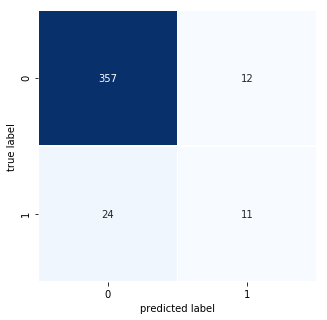

In [424]:
mtx = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(mtx, xticklabels= 'auto', yticklabels='auto', cmap="Blues", annot=True, fmt='d', linewidths=.5,  cbar=False, ax=ax)
#  square=True,
plt.ylabel('true label')
plt.xlabel('predicted label')

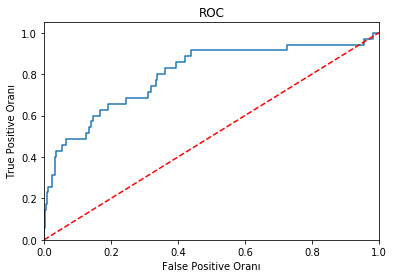

In [425]:
fpr, tpr, thresholds = roc_curve(y_test, loj_model.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

In [426]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))
logit_roc_auc

0.576841108939912

# Newton ile train-test

In [356]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.20, 
                                                    random_state = 42)
loj = LogisticRegression(solver = "newton-cg")
loj_model = loj.fit(X_train,y_train)

y_probs = loj_model.predict_proba(X_test)
y_probs = y_probs[:,1]
y_probs[0:10]
y_pred = [1 if i > 0.3 else 0 for i in y_probs]

print("accuracy:" + str(accuracy_score(y_test, y_pred))) # accuracy de artış var.

print("cross_val_mean : " + str(cross_val_score(loj_model, X_test, y_test, cv = 10).mean()))

print(classification_report(y_test, y_pred))

C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The 

accuracy:0.9282178217821783


C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

cross_val_mean : 0.9283442776735461
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       369
           1       0.67      0.34      0.45        35

   micro avg       0.93      0.93      0.93       404
   macro avg       0.80      0.66      0.71       404
weighted avg       0.92      0.93      0.92       404



C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


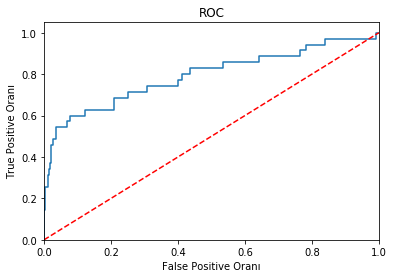

In [357]:
fpr, tpr, thresholds = roc_curve(y_test, loj_model.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

Text(0.5, 24.0, 'predicted label')

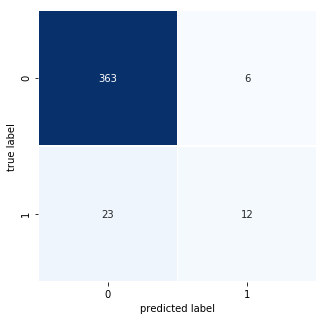

In [358]:
mtx = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(mtx, xticklabels= 'auto', yticklabels='auto', cmap="Blues", annot=True, fmt='d', linewidths=.5,  cbar=False, ax=ax)
#  square=True,
plt.ylabel('true label')
plt.xlabel('predicted label')

# Eksik değerlerden kategorik olanları mod ve sürekli değişkenlerden eksik olanları mean ile doldurmak 

# Kategorik değişkenlere dummy yapılması.

# Normalizasyon

In [359]:
data1.head(5)

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [290]:
# mortdue , value gibi yüksek değerli değişkenlerin clno gibi değişkenleri baskılamaması için normalizasyon yapacağız.

In [360]:
data1.isnull().sum()

bad          0
loan         0
mortdue    314
value       64
reason     147
job        167
yoj        312
derog      427
delinq     351
clage      179
ninq       303
clno       133
debtinc    767
dtype: int64

In [361]:
data1.fillna(data1.mean()[:],inplace = True)

In [362]:
data1.isnull().sum() # sayısal değişkenlerin hepsini mean ile doldurduk..

bad          0
loan         0
mortdue      0
value        0
reason     147
job        167
yoj          0
derog        0
delinq       0
clage        0
ninq         0
clno         0
debtinc      0
dtype: int64

In [99]:
data2.describe().T

,count,mean,std,min,25%,50%,75%,max
bad,3576.0,0.199385,0.399594,0.00,0.00,0.000,0.00,1.000
loan,3576.0,18529.697987,11262.834060,1100.00,11000.00,16200.000,23100.00,89900.000
mortdue,3262.0,74013.907992,44016.833772,2619.00,46700.25,65858.000,91717.00,399550.000
value,3512.0,101076.922759,54865.275351,8800.00,65753.00,89183.000,118928.25,850000.000
yoj,3264.0,8.832644,7.568046,0.00,3.00,7.000,13.00,41.000
derog,3149.0,0.261670,0.865178,0.00,0.00,0.000,0.00,10.000
delinq,3225.0,0.432558,1.099230,0.00,0.00,0.000,0.00,15.000
clage,3397.0,179.832529,87.066198,0.49,115.60,173.640,230.71,1168.230
ninq,3273.0,1.186373,1.728723,0.00,0.00,1.000,2.00,17.000
clno,3443.0,21.507116,10.167490,0.00,15.00,20.000,26.00,71.000


In [100]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
bad,3576.0,0.199385,0.399594,0.00,0.00000,0.000000,0.000000,1.000
loan,3576.0,18529.697987,11262.834060,1100.00,11000.00000,16200.000000,23100.000000,89900.000
mortdue,3576.0,74013.907992,42039.367757,2619.00,48577.00000,70009.000000,88029.000000,399550.000
value,3576.0,101076.922759,54371.955751,8800.00,66250.00000,89936.000000,118402.250000,850000.000
yoj,3576.0,8.832644,7.230266,0.00,3.00000,8.000000,12.000000,41.000
derog,3576.0,0.261670,0.811867,0.00,0.00000,0.000000,0.000000,10.000
delinq,3576.0,0.432558,1.043874,0.00,0.00000,0.000000,0.432558,15.000
clage,3576.0,179.832529,84.858509,0.49,118.00000,177.855000,227.100000,1168.230
ninq,3576.0,1.186373,1.653842,0.00,0.00000,1.000000,2.000000,17.000
clno,3576.0,21.507116,9.976568,0.00,15.00000,21.000000,26.000000,71.000


In [363]:
# kategorik değişkenlerin eksik değerlerinin doldurulması

print(" En sık tekrarlanan sebep:" + str(data1["reason"].mode()[0]))
print(" En sık tekrarlanan iş:" + str(data1["job"].mode()[0]))

data1["job"].fillna(data1["job"].mode()[0],inplace = True)
data1["reason"].fillna(data1["reason"].mode()[0], inplace = True)

 En sık tekrarlanan sebep:DebtCon
 En sık tekrarlanan iş:Other


In [364]:
data1.isnull().sum() 
# Eksik değerimiz kalmadı.

bad        0
loan       0
mortdue    0
value      0
reason     0
job        0
yoj        0
derog      0
delinq     0
clage      0
ninq       0
clno       0
debtinc    0
dtype: int64

In [ ]:
# AYKIRI GÖZLEMLER

Text(0, 0.5, 'derog')

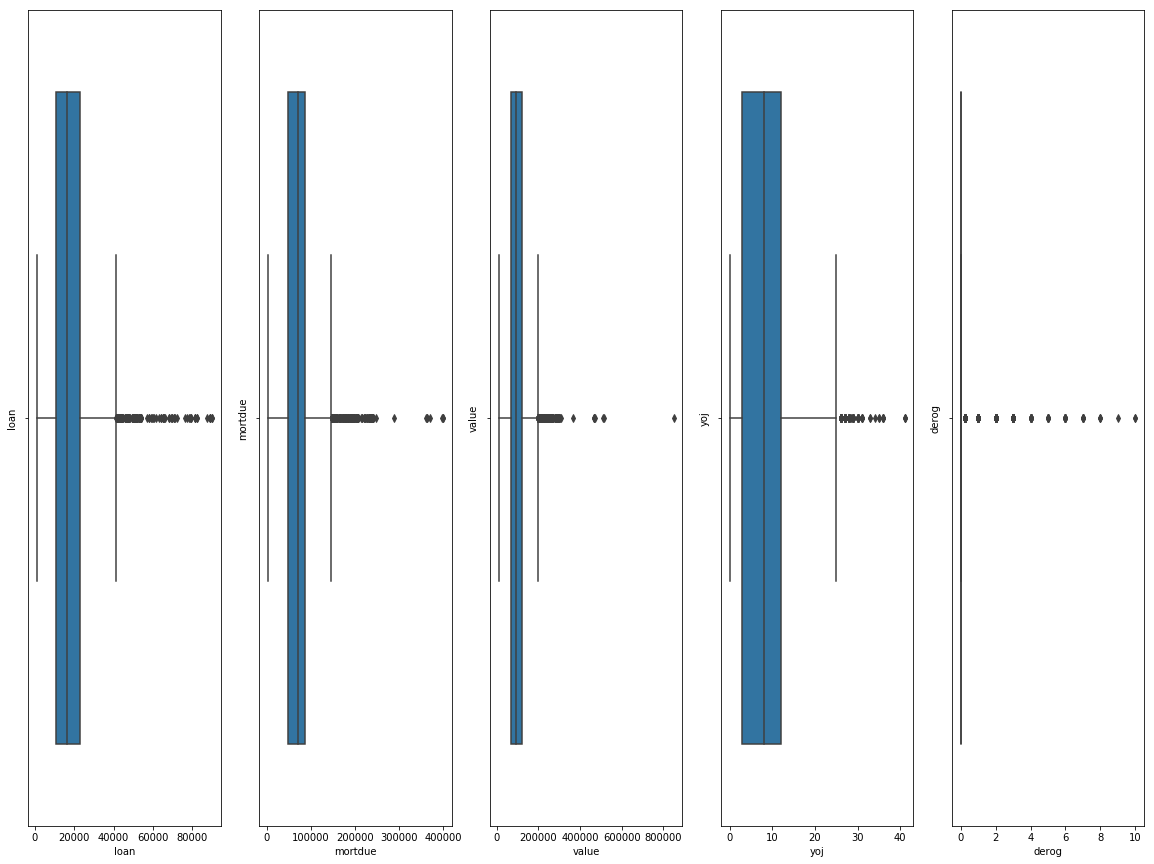

In [160]:
fig, ax = plt.subplots(1, 5, figsize = (20, 15))
sns.boxplot(x="loan", data = data1, ax = ax[0])
ax[0].set_ylabel("loan")
sns.boxplot(x="mortdue", data = data1, ax = ax[1])
ax[1].set_ylabel("mortdue")
sns.boxplot(x="value", data = data1, ax = ax[2])
ax[2].set_ylabel("value")
sns.boxplot(x="yoj", data = data1, ax = ax[3])
ax[3].set_ylabel("yoj")
sns.boxplot(x="derog", data = data1, ax = ax[4])
ax[4].set_ylabel("derog")


Text(0, 0.5, 'debtinc')

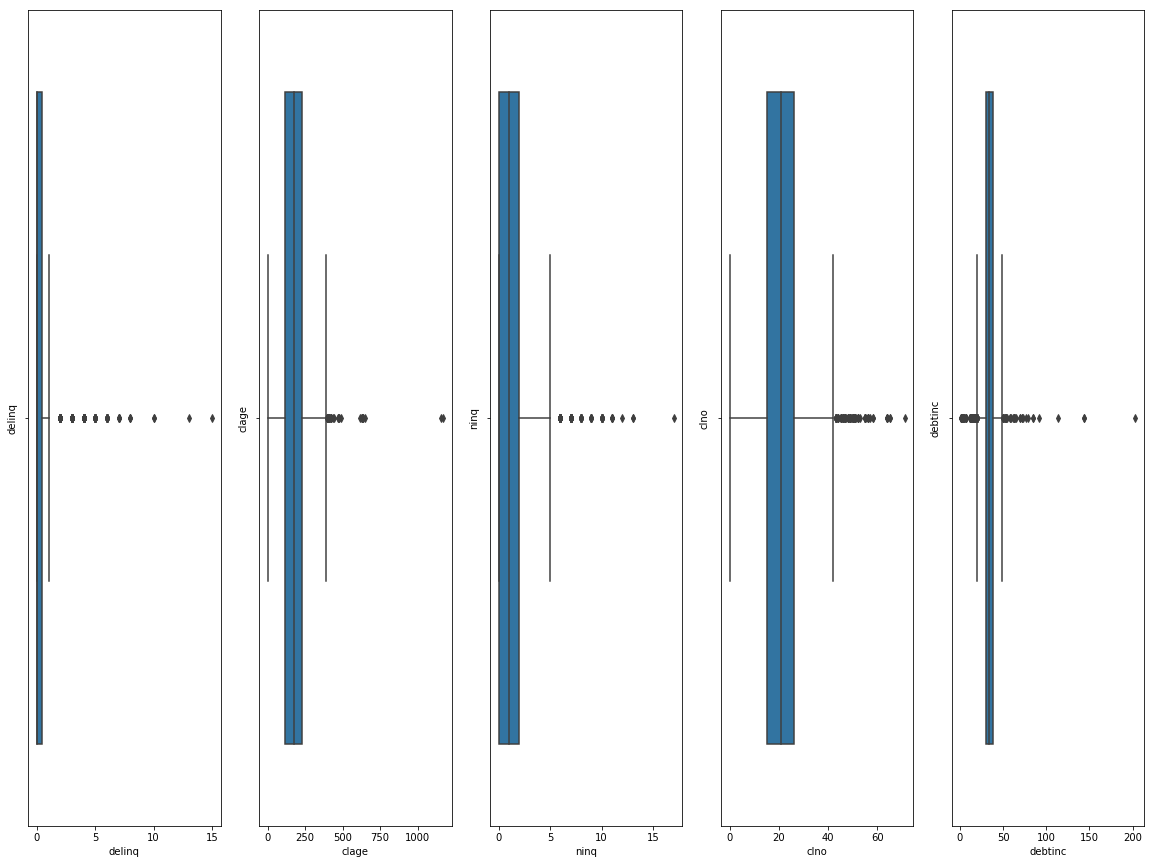

In [161]:
fig, ax = plt.subplots(1, 5, figsize = (20, 15))
sns.boxplot(x="delinq", data = data1, ax = ax[0])
ax[0].set_ylabel("delinq")
sns.boxplot(x="clage", data = data1, ax = ax[1])
ax[1].set_ylabel("clage")
sns.boxplot(x="ninq", data = data1, ax = ax[2])
ax[2].set_ylabel("ninq")
sns.boxplot(x="clno", data = data1, ax = ax[3])
ax[3].set_ylabel("clno")
sns.boxplot(x="debtinc", data = data1, ax = ax[4])
ax[4].set_ylabel("debtinc")

In [365]:
# kategorik değişkenlere dummy

cat = pd.get_dummies(data1[['reason', 'job']])

X_ = data1.drop(["reason","job"], axis = 1).astype("float64")
X_ = X_.drop(["bad"],axis = 1)

In [366]:
X_.head()

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
0,81200.0,18834.0,108355.0,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,12600.0,103960.0,127384.0,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,18000.0,46865.0,61266.0,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,10300.0,57676.0,71027.0,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,9400.0,56508.0,78358.0,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [367]:
cat.head()

,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
0,0,1,0,0,1,0,0,0
1,1,0,0,0,1,0,0,0
2,1,0,0,0,1,0,0,0
3,1,0,0,0,1,0,0,0
4,1,0,0,0,1,0,0,0


In [368]:
X = pd.concat([X_, cat[["reason_DebtCon","reason_HomeImp","job_Mgr"	,"job_Office","job_Other","job_ProfEx","job_Sales","job_Self"]]], axis = 1)
X.head()

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
0,81200.0,18834.0,108355.0,28.0,0.0,0.0,139.14,0.0,14.0,34.042,0,1,0,0,1,0,0,0
1,12600.0,103960.0,127384.0,2.0,0.0,0.0,129.02,0.0,25.0,34.479,1,0,0,0,1,0,0,0
2,18000.0,46865.0,61266.0,5.0,0.0,0.0,102.59,2.0,9.0,26.354,1,0,0,0,1,0,0,0
3,10300.0,57676.0,71027.0,19.0,0.0,0.0,157.52,1.0,11.0,33.992,1,0,0,0,1,0,0,0
4,9400.0,56508.0,78358.0,17.0,0.0,0.0,141.93,0.0,11.0,32.327,1,0,0,0,1,0,0,0


In [369]:
y = data2["bad"]

In [370]:
from sklearn import preprocessing

preprocessing.normalize(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.20, 
                                                    random_state = 42)

In [371]:
loj = sm.Logit(y, X)
loj_model= loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.395744
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 3576
Model:                          Logit   Df Residuals:                     3559
Method:                           MLE   Df Model:                           16
Date:                Thu, 06 Aug 2020   Pseudo R-squ.:                  0.2078
Time:                        18:33:38   Log-Likelihood:                -1415.2
converged:                       True   LL-Null:                       -1786.4
                                        LLR p-value:                1.204e-147
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
loan           -1.753e-05   5.14e-06     -3.411      0.001   -2.76e-05   -7.46e-06
mortdue        -5.287e-06   1.95e-06     -2.716      0.007    -9.1e-06   -1.47e-06
value           3.036e-06   1.49e-06      2.033      0.042    1.09e-07    5.96e-06
yoj               -0.0115      0.007     -1.553      0.121      -0.026       0.003
derog              0.4965      0.060      8.235      0.000       0.378       0.615
delinq             0.7567      0.050     15.068      0.000       0.658       0.855
clage             -0.0051      0.001     -7.353      0.000      -0.006      -0.004
ninq               0.1660      0.026      6.321      0.000       0.115       0.218
clno              -0.0127      0.005     -2.331      0.020      -0.023      -0.002
debtinc            0.0602      0.008      7.591      0.000       0.045       0.076
reason_DebtCon    -1.9541   2.83e+06  -6.91e-07      1.000   -5.55e+06    5.55e+06
reason_HomeImp    -1.6066   2.83e+06  -5.68e-07      1.000   -5.55e+06    5.55e+06
job_Mgr           -0.7501   2.83e+06  -2.65e-07      1.000   -5.55e+06    5.55e+06
job_Office        -1.4008   2.83e+06  -4.95e-07      1.000   -5.55e+06    5.55e+06
job_Other         -0.7609   2.83e+06  -2.69e-07      1.000   -5.55e+06    5.55e+06
job_ProfEx        -0.7497   2.83e+06  -2.65e-07      1.000   -5.55e+06    5.55e+06
job_Sales          0.2836   2.83e+06      1e-07      1.000   -5.55e+06    5.55e+06
job_Self          -0.1828   2.83e+06  -6.46e-08      1.000   -5.55e+06    5.55e+06
==================================================================================
"""

In [372]:
loj = LogisticRegression(solver = "newton-cg")
loj_model = loj.fit(X_train,y_train)

y_probs = loj_model.predict_proba(X_test)
y_probs = y_probs[:,1]
y_probs[0:10]
y_pred = [1 if i > 0.3 else 0 for i in y_probs]

print("train accuracy:" + str(accuracy_score(y_train, loj_model.predict(X_train)))) 


print("test accuracy:" + str(accuracy_score(y_test, y_pred))) 



print("cross_val_mean : " + str(cross_val_score(loj_model, X_test, y_test, cv = 10).mean()))

print(classification_report(y_test, y_pred))

C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iter

train accuracy:0.8346153846153846
test accuracy:0.8142458100558659


C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorith

cross_val_mean : 0.8477645936501812
              precision    recall  f1-score   support

           0       0.89      0.88      0.89       591
           1       0.47      0.51      0.49       125

   micro avg       0.81      0.81      0.81       716
   macro avg       0.68      0.70      0.69       716
weighted avg       0.82      0.81      0.82       716



C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


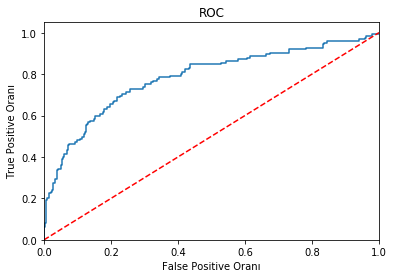

In [373]:
fpr, tpr, thresholds = roc_curve(y_test, loj_model.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

Text(0.5, 24.0, 'predicted label')

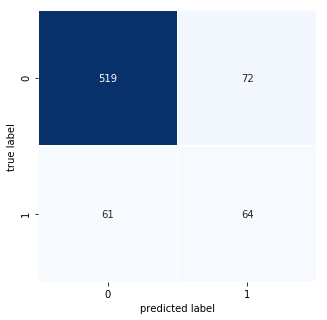

In [374]:
mtx = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(mtx, xticklabels= 'auto', yticklabels='auto', cmap="Blues", annot=True, fmt='d', linewidths=.5,  cbar=False, ax=ax)
#  square=True,
plt.ylabel('true label')
plt.xlabel('predicted label')

# sadece dummy ve eksik değerlerin çıkarılması

In [375]:
data2.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [376]:
data2 = data2.dropna()

In [377]:
# kategorik değişkenlere dummy

y = data2["bad"]

cat = pd.get_dummies(data2[['reason', 'job']])

X_ = data2.drop(["bad","reason","job"], axis = 1).astype("float64")

cat.head()

X = pd.concat([X_, cat[["reason_DebtCon","reason_HomeImp","job_Mgr" ,"job_Office","job_Other","job_ProfEx","job_Sales","job_Self"]]], axis = 1)
X.head()


,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
153,18200.0,94727.0,136877.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056,1,0,1,0,0,0,0,0
154,21700.0,79240.0,96784.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079,1,0,1,0,0,0,0,0
155,34100.0,241931.0,36486.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459,1,0,1,0,0,0,0,0
156,8400.0,62989.0,76718.0,3.0,0.0,2.0,131.47,0.0,22.0,29.200,0,1,1,0,0,0,0,0
157,17400.0,25859.0,43684.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108,1,0,1,0,0,0,0,0


In [378]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.20, 
                                                    random_state = 42)
loj = sm.Logit(y, X)
loj_model= loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.228362
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 2018
Model:                          Logit   Df Residuals:                     2001
Method:                           MLE   Df Model:                           16
Date:                Thu, 06 Aug 2020   Pseudo R-squ.:                  0.2346
Time:                        18:34:10   Log-Likelihood:                -460.84
converged:                       True   LL-Null:                       -602.11
                                        LLR p-value:                 1.039e-50
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
loan            -1.73e-05   1.05e-05     -1.640      0.101    -3.8e-05    3.37e-06
mortdue        -4.777e-06   4.76e-06     -1.004      0.315   -1.41e-05    4.55e-06
value           4.089e-06   4.06e-06      1.006      0.314   -3.87e-06    1.21e-05
yoj               -0.0109      0.013     -0.854      0.393      -0.036       0.014
derog              0.5708      0.130      4.382      0.000       0.315       0.826
delinq             0.7985      0.095      8.448      0.000       0.613       0.984
clage             -0.0046      0.001     -3.354      0.001      -0.007      -0.002
ninq               0.1119      0.049      2.303      0.021       0.017       0.207
clno              -0.0286      0.011     -2.627      0.009      -0.050      -0.007
debtinc            0.1143      0.014      8.222      0.000       0.087       0.142
reason_DebtCon    -3.7938   2.64e+07  -1.44e-07      1.000   -5.17e+07    5.17e+07
reason_HomeImp    -3.8593   2.64e+07  -1.46e-07      1.000   -5.17e+07    5.17e+07
job_Mgr           -1.4722   2.64e+07  -5.58e-08      1.000   -5.17e+07    5.17e+07
job_Office        -2.0716   2.64e+07  -7.86e-08      1.000   -5.17e+07    5.17e+07
job_Other         -1.5260   2.64e+07  -5.79e-08      1.000   -5.17e+07    5.17e+07
job_ProfEx        -1.5377   2.64e+07  -5.83e-08      1.000   -5.17e+07    5.17e+07
job_Sales         -0.2487   2.64e+07  -9.43e-09      1.000   -5.17e+07    5.17e+07
job_Self          -0.7970   2.64e+07  -3.02e-08      1.000   -5.17e+07    5.17e+07
==================================================================================
"""

Text(0.5, 24.0, 'predicted label')

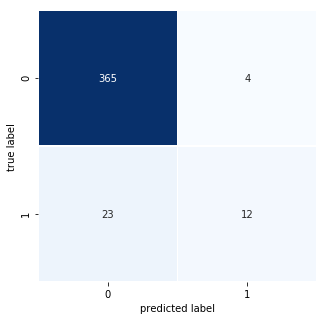

In [380]:
mtx = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(mtx, xticklabels= 'auto', yticklabels='auto', cmap="Blues", annot=True, fmt='d', linewidths=.5,  cbar=False, ax=ax)
#  square=True,
plt.ylabel('true label')
plt.xlabel('predicted label')

C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


train accuracy:0.9256505576208178
test accuracy:0.9331683168316832


C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of

cross_val_mean : 0.9283442776735461
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       369
           1       0.75      0.34      0.47        35

   micro avg       0.93      0.93      0.93       404
   macro avg       0.85      0.67      0.72       404
weighted avg       0.92      0.93      0.92       404



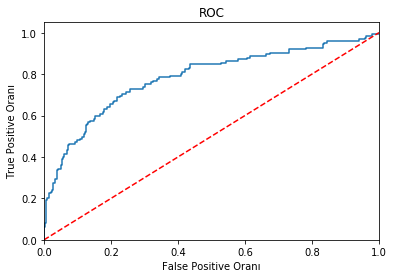

In [379]:
loj = LogisticRegression(solver = "newton-cg")
loj_model = loj.fit(X_train,y_train)

y_probs = loj_model.predict_proba(X_test)
y_probs = y_probs[:,1]
y_probs[0:10]
y_pred = [1 if i > 0.3 else 0 for i in y_probs]

print("train accuracy:" + str(accuracy_score(y_train, loj_model.predict(X_train)))) 


print("test accuracy:" + str(accuracy_score(y_test, y_pred))) 



print("cross_val_mean : " + str(cross_val_score(loj_model, X_test, y_test, cv = 10).mean()))

print(classification_report(y_test, y_pred))

plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()
